## 实验四：pyecharts可视化

In [5]:
import pyecharts.charts
print(dir(pyecharts.charts))

['BMap', 'Bar', 'Bar3D', 'Boxplot', 'Calendar', 'Candlestick', 'Custom', 'EffectScatter', 'Funnel', 'Gauge', 'Geo', 'Graph', 'GraphGL', 'Grid', 'HeatMap', 'Kline', 'Line', 'Line3D', 'Lines3D', 'Liquid', 'Map', 'Map3D', 'MapGlobe', 'Page', 'Parallel', 'PictorialBar', 'Pie', 'Polar', 'Radar', 'Sankey', 'Scatter', 'Scatter3D', 'Sunburst', 'Surface3D', 'Tab', 'ThemeRiver', 'Timeline', 'Tree', 'TreeMap', 'WordCloud', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'basic_charts', 'chart', 'composite_charts', 'mixins', 'three_axis_charts']


In [4]:
! pip install pyecharts


  Obtaining dependency information for pyecharts from https://files.pythonhosted.org/packages/90/75/80787852e131e52a644751a993e8c55b679ffdc83130bdd35e6e9a450308/pyecharts-2.0.6-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/d9/5a/bfdc26c0e19156992b1dc9de47f0b2e8992fe43db9981d814f860bdce2b3/prettytable-3.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/be/8f/a0089eff060f10a925f08b0a0f50854321484f1ac54b1895bbf4c9213dfe/simplejson-3.19.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/149.4 kB 991.0 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/149.4 kB 787.7 kB/s eta 0:00:01
   -------------------------------- ------- 122.9/149.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 149.4/149.4 kB 892.1 

## 图表的全局配置项

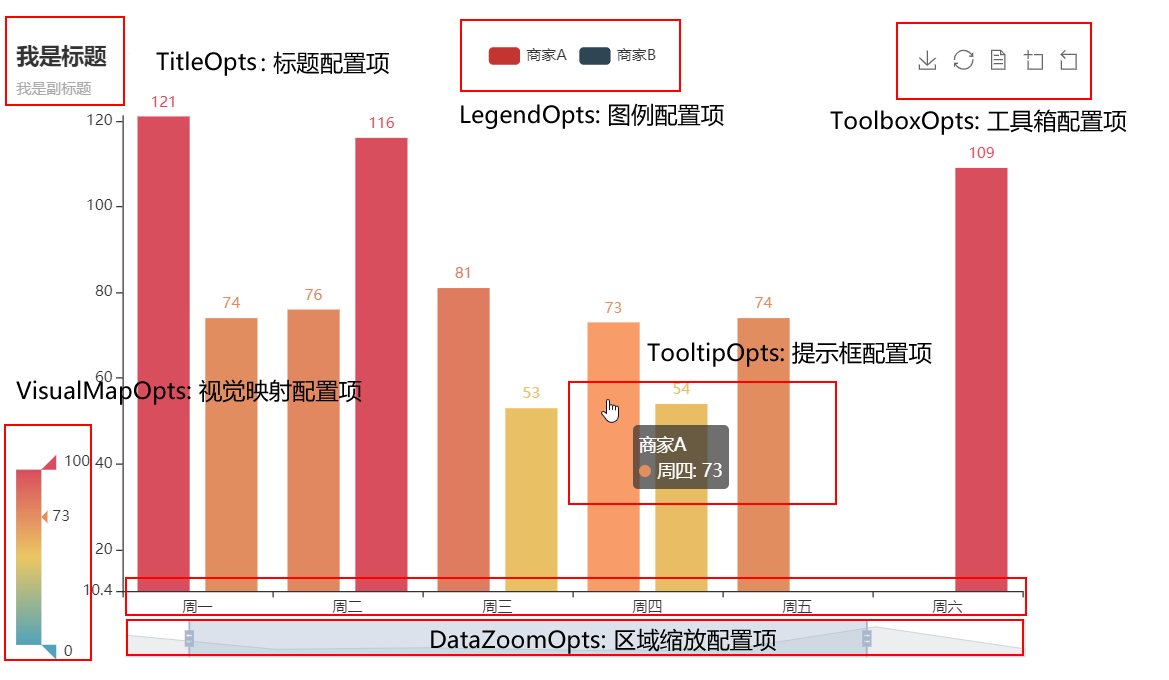

## 常见图表

### 1.柱形图 Bar() 
* 使用多列柱形图对“居民人均收支.xls”数据可视化，通过柱形展示各个年度“居民收入”、“城镇居民收入”、“农村居民收入”。
* 通过区域缩放配置项添加区域缩放功能，可通过滑动选择展示的数据范围
* 通过可视化图表进行简要分析。
* 通过全局配置项配置标题、图例、坐标轴等，并且配置工具箱，展示查看数据视图、切换为折线图、切换为堆叠等功能（截图）。
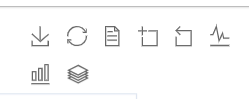

In [64]:
# 导入柱形图模块Bar
from pyecharts.charts import Bar
import matplotlib.pyplot as plt
import pandas as pd

# 绘制柱形图
bar = Bar()

data = pd.read_excel(r"E:\jupyter\可视化实验\实验四\data\居民人均收支.xls")
attr = ["居民收入","城镇居民收入","农村居民收入"]

v1 = [[data['2020年'].tolist()[0],data['2020年'].tolist()[2],data['2020年'].tolist()[4]]]
v2 = [[data['2019年'].tolist()[0],data['2019年'].tolist()[2],data['2019年'].tolist()[4]]]
v3 = [data['2018年'].tolist()[0], data['2018年'].tolist()[2], data['2018年'].tolist()[4]]
# 添加x轴坐标
li = data.columns

# 添加y轴坐标，第一个元素是类别，第二个是y轴坐标数据列表

bar.add_xaxis(attr)
bar.add_yaxis(li[1],v1)
bar.add_yaxis(li[2], v2)
bar.add_yaxis(li[3], v3)

# 利用bar.render()在当前目录下生成render.html文件
# 或传入路径参数在指定目录下生成HTML文件
bar.render("柱形图.html")


'e:\\jupyter\\可视化实验\\实验四\\柱形图.html'

### 2.雷达图
* 使用雷达图对“居民人均收支.xls”数据可视化，对比“居民收入”、“城镇居民收入”、“农村居民收入”。
* 通过可视化图表进行简要分析。

In [65]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import *


def radar_base() -> Radar:
    c = (
        Radar()
        .add_schema(
            schema=[
                opts.RadarIndicatorItem(name="居民收入"),
                opts.RadarIndicatorItem(name="城镇居民收入"),
                opts.RadarIndicatorItem(name="农村居民收入")

            ]
        )
        .add(li[1], v1)
        .add(li[2], v2)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(title_opts=opts.TitleOpts(title="Radar-基本示例"))
    )
    return c


radar_base().render_notebook()
# radar_base().render("收入对比雷达图.html")








### 3.散点图 Scatter
* 用散点图对“Ad_sales.csv”数据可视化。
* 通过可视化图表进行简要分析。

In [22]:
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Scatter
import pandas as pd

# data=pd.read_csv('')


data = pd.read_csv('data/Ad_sales.csv')
tv = data['TV'].tolist()
radio = data['radio'].tolist()
newspaper = data['newspaper'].tolist()
sales = data['sales'].tolist()
x=data['Unnamed: 0'].tolist()


c = (
    Scatter()
    .add_xaxis(x)
    .add_yaxis("tv", tv)
    .add_yaxis("radio", radio)
    .add_yaxis("newspaper", newspaper)
    .add_yaxis("sales", sales)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-显示分割线"),
        xaxis_opts=opts.AxisOpts(
            splitline_opts=opts.SplitLineOpts(is_show=True)),
        yaxis_opts=opts.AxisOpts(
            splitline_opts=opts.SplitLineOpts(is_show=True)),
    )
    .render("scatter_splitline.html")
)


### 4.平行坐标图
平行坐标图是可视化高维多元数据的一种常用方法，为了显示多维空间中的一组对象，绘制由多条平行且等距分布的轴，并将多维空间中的对象表示为在平行轴上具有顶点的折线。顶点在每一个轴上的位置就对应了该对象在该维度上的中的变量数值
* 用平行坐标图对“各类学历教育招生人数.xls”数据可视化。
* 通过可视化图表进行简要分析。

In [18]:
data = pd.read_excel('data/各类学历教育招生人数.xls')
data

,指标,2020年,2019年,2018年,2017年,2016年,2015年,2014年,2013年,2012年,...,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年
0,研究生招生数(万人),110.7,91.6503,85.7966,80.6103,66.7064,64.5055,62.1323,61.1381,58.9673,...,53.8177,51.0953,44.6422,41.8612,39.7925,36.4831,32.6286,26.8925,20.2611,16.5197
1,博士招生数(万人),NaN,10.5169,9.5502,8.3878,7.7252,7.4416,7.2634,7.0462,6.8370,...,6.3762,6.1911,5.9764,5.8022,5.5955,5.4794,5.3284,NaN,NaN,NaN
2,硕士招生数(万人),NaN,81.1334,76.2464,72.2225,58.9812,57.0639,54.8689,54.0919,52.1303,...,47.4415,44.9042,38.6658,36.0590,34.1970,31.0037,27.3002,NaN,NaN,NaN
3,普通本专科招生数(万人),967.5,914.9026,790.9931,761.5000,748.6000,737.8000,721.4000,699.8000,688.8000,...,661.8000,639.5000,607.7000,565.9000,546.1000,504.5000,447.3000,382.2000,320.5000,268.3000
4,普通本科招生数(万人),NaN,431.2880,422.1590,410.7534,405.4007,389.4184,383.4152,381.4331,374.0574,...,351.2563,326.1081,297.0601,282.0971,253.0854,236.3647,209.9151,182.5262,158.7939,138.1835
5,普通专科招生数(万人),NaN,483.6146,368.8341,350.7000,343.2000,348.4000,338.0000,318.4000,314.8000,...,310.5000,313.4000,310.6000,283.8000,293.0000,268.1000,237.4000,199.6000,89.1000,66.6000
6,成人本专科招生数(万人),NaN,302.2088,273.3119,217.5302,211.2290,236.7455,265.6040,256.4934,243.9551,...,208.4259,201.4776,202.5552,191.1132,184.4431,193.0250,221.1580,NaN,NaN,NaN
7,成人本科招生数(万人),NaN,150.5520,140.0380,102.3981,96.9387,101.4675,110.2409,103.8158,98.4817,...,85.3319,81.5795,83.1362,82.0858,77.7677,74.7196,75.9434,NaN,NaN,NaN
8,成人专科招生数(万人),NaN,151.6568,133.2739,115.1321,114.2903,135.2780,155.3631,152.6776,145.4734,...,123.0940,119.8981,119.4190,109.0274,106.6754,118.3054,145.2146,NaN,NaN,NaN
9,在职人员攻读博士、硕士学位招生数(万人),NaN,NaN,NaN,NaN,NaN,NaN,16.2374,16.7576,14.0629,...,12.4871,11.5985,13.3370,12.6884,10.9245,10.1653,7.8171,NaN,NaN,NaN


### 5.箱型图
* 用箱型图对“造林总面积.xls”数据可视化。
* 通过可视化图表进行简要分析。

In [77]:
from pyecharts import options as opts
from pyecharts.charts import Boxplot

df = pd.read_excel('data/造林总面积.xls')
df=df.transpose()
df.columns = df.iloc[0, :]
df.drop(df.index[0], inplace=True)
total_area_data = df["造林总面积(千公顷)"]
# 创建箱型图对象
boxplot = Boxplot()

# 准备箱型图数据格式，需要将数据转换为特定格式
boxplot_data = [total_area_data.tolist()]

# 添加数据系列到箱型图
boxplot.add_xaxis(["造林总面积(千公顷)"])
boxplot.add_yaxis("", boxplot_data)

# 设置全局配置项
boxplot.set_global_opts(
    title_opts=opts.TitleOpts(title="造林总面积箱型图"),
    yaxis_opts=opts.AxisOpts(name="造林总面积(千公顷)"),
    xaxis_opts=opts.AxisOpts(name="指标"),
)

# 渲染生成HTML文件，可在浏览器中查看箱型图
boxplot.render("造林总面积箱型图.html")
df

指标,造林总面积(千公顷),当年人工造林面积(千公顷),当年飞机播种面积(千公顷),封山育林(千公顷),用材林当年造林面积(千公顷),经济林当年造林面积(千公顷),防护林当年造林面积(千公顷),薪炭林当年造林面积(千公顷),特种用林当年造林面积(千公顷),注：1.自2015年起造林面积包括人工造林、飞播造林、新封山育林、退化林修复和人工更新。,2.自2019年起新封山育林指标名称改为封山育林。,数据来源：国家统计局
2020年,6770.0,2890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019年,7390.29,3458.32,125.56,1898.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018年,7299.47,3677.95,135.43,1785.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017年,7680.71,4295.89,141.22,1657.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016年,7203.51,3823.66,162.32,1953.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015年,7683.69,4362.59,128.39,2152.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014年,5549.61,4052.91,108.06,1388.64,1092.35,1139.19,3238.66,36.95,42.46,NaN,NaN,NaN
2013年,6100.06,4209.69,154.4,1735.97,1057.56,1233.68,3748.41,24.9,35.52,NaN,NaN,NaN
2012年,5595.79,3820.7,136.41,1638.68,774.4,1101.05,3650.84,41.15,28.35,NaN,NaN,NaN
2011年,5996.61,4065.69,196.93,1733.99,1019.32,1218.28,3688.83,36.8,33.38,NaN,NaN,NaN


### 6.仪表盘
* 用仪表盘对“学员学习情况列表.xls”数据可视化。
* 通过可视化图表进行简要分析。

In [57]:
import pyecharts.options as opts
from pyecharts.charts import Gauge
df = pd.read_excel('data/学员学习情况列表.xls')
df.columns=df.iloc[0,:]
df.drop(df.index[0], inplace=True)

(
    Gauge()
    .add(series_name="10407", data_pair=[["测验平均正确率", 61.7]])
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        tooltip_opts=opts.TooltipOpts(
            is_show=True, formatter="{a} <br/>{b} : {c}%"),
    )
    .render("gauge.html")
)

df

,学号,学习进度,作业完成情况,测验完成情况,作业平均得分,测验平均正确率,学习时长
1,10407,0,0/6,0/8,0,0,00:00:00
2,10211,93.94,8/6,8/8,87.6,61.7,00:24:41
3,10101,106.06,7/6,7/8,83,55.4,00:20:52
4,10102,90.91,7/6,6/8,86.4,31.7,00:58:31
5,10103,109.09,8/6,8/8,82,24.2,01:41:06
...,...,...,...,...,...,...,...
83,10181,60.61,7/6,6/8,79.1,6.7,00:06:00
84,10182,100,8/6,6/8,85.8,12.5,00:07:57
85,10183,84.85,6/6,6/8,63.5,32.1,03:24:29
86,10184,78.79,4/6,8/8,49.8,47.5,00:05:51


### 7.饼图
* 用饼图对“居民人均消费支出.xls”数据可视化。
* 通过可视化图表进行简要分析。

df = pd.read_excel('data/居民人均消费支出.xls')

In [54]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker
df = pd.read_excel('data/居民人均消费支出.xls')
df.columns = df.iloc[0, :]
df.drop(df.index[0], inplace=True)

c = (
    Pie()
    .add("全国", [list(z) for z in zip(df.columns, df.iloc[0,1:])])
    .set_colors(["blue", "green", "yellow", "red", "pink", "orange", "purple"])
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render("pie_set_color.html")
)


In [52]:
df


,地区,消费支出,食品烟酒,衣着,居住,生活用品及服务,交通通信,教育文化娱乐,医疗保健,其他用品及服务
1,全国,21558.9,6084.2,1338.1,5054.8,1280.9,2861.6,2513.1,1902.3,524
2,北京,43038.3,8488.5,2229.5,15751.4,2387.3,4979,4310.9,3739.7,1151.9
3,天津,31853.6,8983.7,1999.5,6946.1,1956.7,4236.4,3584.4,2991.9,1154.9
4,河北,17987.2,4675.7,1304.8,4301.6,1170.4,2415.7,1984.1,1699,435.8
5,山西,15862.6,3997.2,1289.9,3331.6,910.7,1979.7,2136.2,1820.7,396.5
6,内蒙古,20743.4,5517.3,1765.4,3943.7,1185.8,3218.4,2407.7,2108,597.1
7,辽宁,22202.8,5956.6,1586.1,4417,1275.3,2848.5,2929.3,2434.2,756
8,吉林,18075.4,4675.4,1406.8,3351.5,948.3,2518.1,2436.6,2174,564.7
9,黑龙江,18111.5,4781.1,1437.6,3314.2,844.8,2317.4,2444.9,2457.1,514.4
10,上海,45605.1,10952.6,2071.8,15046.4,2122.8,5355.7,5495.1,3204.8,1355.9
